# 3.2 Team Comparison Analysis 
## Contributor: Anthony Mapuyan
## Teams Chosen : Stony Brook Football & Stony Brook Men's Basketball 

In [4]:
# Code to connect to the database and perform analysis
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
import seaborn as sns

pd.set_option("display.max_rows", None)

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT", "3306")
DB_NAME = os.getenv("DB_NAME")
DB_TABLE = os.getenv("DB_TABLE", "research_experiment_refractor_test")

connection_string = (
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

engine = create_engine(connection_string)

print("Database connection established successfully.")

df = pd.read_sql(text(f"SELECT * FROM {DB_TABLE}"), engine)
df.head()


selected_metrics = [
    "Jump Height(m)",
    "Peak Propulsive Force(N)",
    "Peak Velocity(m/s)",
    "Propulsive Net Impulse(N.s)",
    "mRSI",
]


Database connection established successfully.


In [5]:
# filter teams based on coverage of selected metrics
metrics_sql = ", ".join([f"'{m}'" for m in selected_metrics])

query_team_coverage = f"""
SELECT 
    team,
    COUNT(DISTINCT metric) AS num_metrics_found
FROM {DB_TABLE}
WHERE metric IN ({metrics_sql})
GROUP BY team
ORDER BY num_metrics_found DESC;
"""

team_coverage = pd.read_sql(text(query_team_coverage), engine)
team_coverage

,team,num_metrics_found
0,Team: Old Football,5
1,Team: Stony Brook Men's Soccer,5
2,"Team: Stony Brook Men's Basketball , Team: Men...",5
3,Team: Stony Brook Men's Basketball,5
4,"Team: Stony Brook Football, Team: Stony Brook",5
5,Team: Stony Brook Football,5
6,Team: Stony Brook Baseball,5
7,Team: Stony Brook,5
8,Team: SBU WLAX,5
9,Team: Stony Brook Men's T&F,5


In [6]:
import numpy as np
# Make sure timestamp is datetime just in case
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Create a cleaner team label based on substring patterns
df["team_clean"] = np.select(
    [
        df["team"].str.contains("Stony Brook Football", case=False, na=False),
        df["team"].str.contains("Men's Basketball", case=False, na=False),
    ],
    [
        "Stony Brook Football (Men)",
        "Stony Brook Men's Basketball",
    ],
    default="Other"
)

df["team_clean"].value_counts()

team_clean
Other                           5687439
Stony Brook Men's Basketball     483336
Stony Brook Football (Men)       446651
Name: count, dtype: int64

In [7]:
# Select only the teams of interest
teams_of_interest = [
    "Stony Brook Football (Men)",
    "Stony Brook Men's Basketball",
]

df_teams = df[df["team_clean"].isin(teams_of_interest)].copy()
df_teams["team_clean"].value_counts()


team_clean
Stony Brook Men's Basketball    483336
Stony Brook Football (Men)      446651
Name: count, dtype: int64

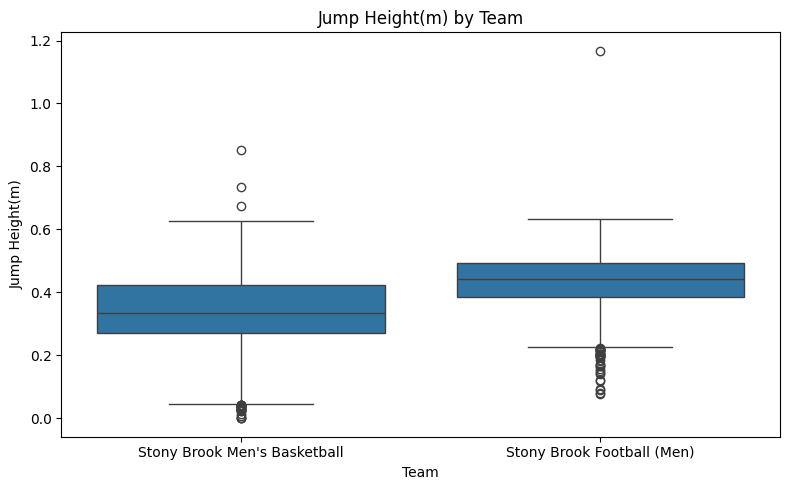

In [8]:
# Box Plot comparing Jump height
metric = "Jump Height(m)"

df_metric = df_teams[df_teams["metric"] == metric].copy()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_metric, x="team_clean", y="value")
plt.title(f"{metric} by Team")
plt.xlabel("Team")
plt.ylabel(metric)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

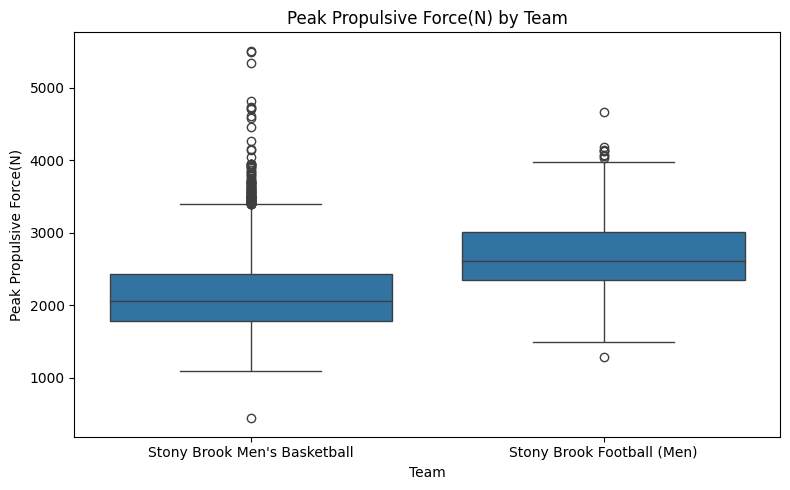

In [11]:
# Peak Propulsive Force(N) comparison
metric = "Peak Propulsive Force(N)"

df_metric = df_teams[df_teams["metric"] == metric].copy()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_metric, x="team_clean", y="value")
plt.title(f"{metric} by Team")
plt.xlabel("Team")
plt.ylabel(metric)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

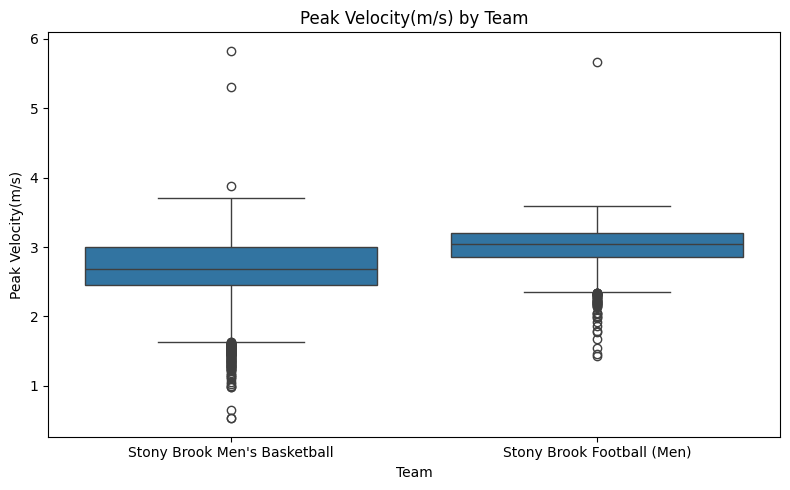

In [12]:
# Peak Velocity(m/s) comparison
metric = "Peak Velocity(m/s)"

df_metric = df_teams[df_teams["metric"] == metric].copy()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_metric, x="team_clean", y="value")
plt.title(f"{metric} by Team")
plt.xlabel("Team")
plt.ylabel(metric)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

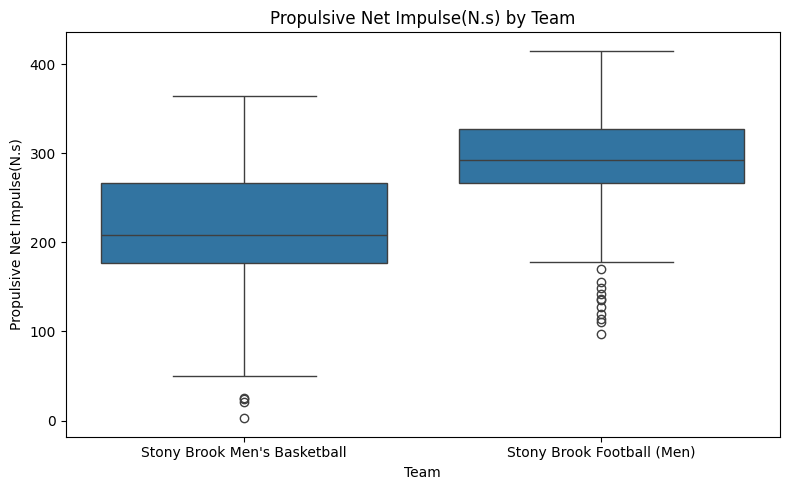

In [13]:
# Propulsive Net Impulse(N.s) comparison
metric = "Propulsive Net Impulse(N.s)"

df_metric = df_teams[df_teams["metric"] == metric].copy()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_metric, x="team_clean", y="value")
plt.title(f"{metric} by Team")
plt.xlabel("Team")
plt.ylabel(metric)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

team_clean
Stony Brook Men's Basketball    6168
Stony Brook Football (Men)      5786
Name: count, dtype: int64


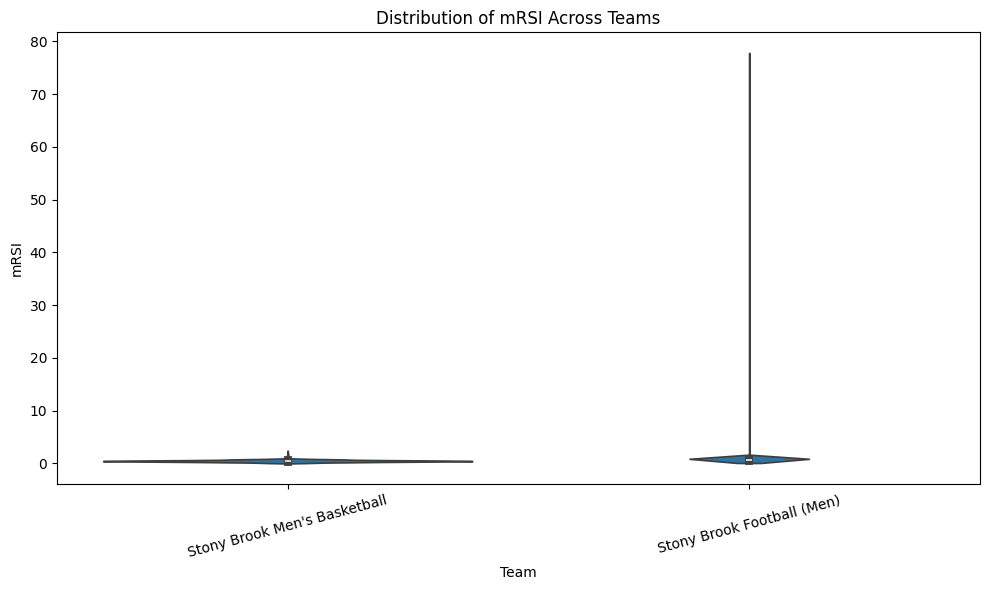

In [ ]:
# Violin Plot mRSI comparison

df["team_clean"] = np.select(
    [
        df["team"].str.contains("Stony Brook Football", case=False, na=False),
        df["team"].str.contains("Men's Basketball", case=False, na=False),
    ],
    [
        "Stony Brook Football (Men)",
        "Stony Brook Men's Basketball",
    ],
    default="Other"
)

teams_of_interest = [
    "Stony Brook Football (Men)",
    "Stony Brook Men's Basketball",
]

df_teams = df[df["team_clean"].isin(teams_of_interest)].copy()


metric_to_plot = "mRSI"

# Filter to just that metric and your two teams
df_mrsi = df_teams[df_teams["metric"] == metric_to_plot].copy()

print(df_mrsi["team_clean"].value_counts())  

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_mrsi,
    x="team_clean",      
    y="value",
    inner="box",
    cut=0
)

plt.title(f"Distribution of {metric_to_plot} Across Teams")
plt.xlabel("Team")
plt.ylabel(metric_to_plot)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()




In [ ]:
# Statistical significance (t-test)
group_a = df_metric[df_metric["team_clean"] == "Stony Brook Football (Men)"]["value"]
group_b = df_metric[df_metric["team_clean"] == "Stony Brook Men's Basketball"]["value"]

t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False, nan_policy='omit')
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 54.198317492175555
p-value: 0.0


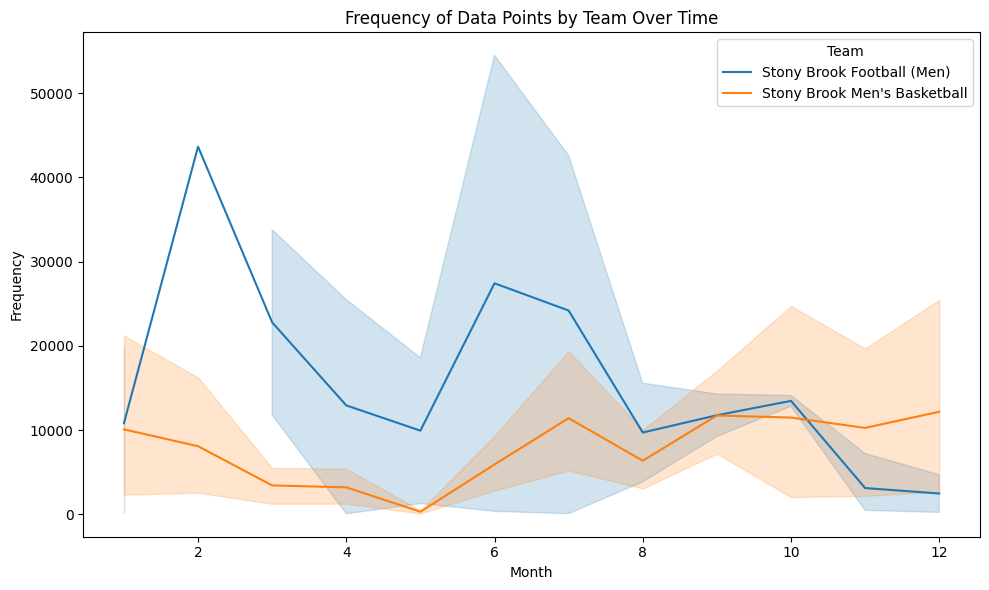

In [ ]:
# Testing frequency by team over time
df_teams["timestamp"] = pd.to_datetime(df_teams["timestamp"], errors="coerce")
df_teams["year"] = df_teams["timestamp"].dt.year
df_teams["month"] = df_teams["timestamp"].dt.month

# Create a frequency count by team and month
freq_by_team_month = df_teams.groupby(["team_clean", "year", "month"]).size().reset_index(name="frequency")

# Plotting frequency over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=freq_by_team_month, x="month", y="frequency", hue="team_clean")
plt.title("Frequency of Data Points by Team Over Time")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.legend(title="Team")
plt.tight_layout()
plt.show()

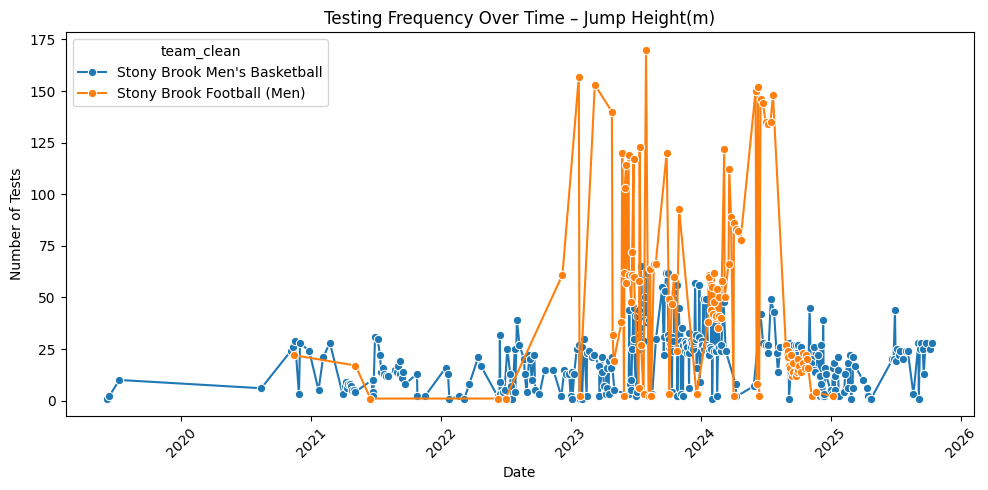

In [ ]:
# Line Plot of Testing Frequency Over Time for Selected Metric
df_freq = (
    df_metric
    .assign(date=df_metric["timestamp"].dt.date)
    .groupby(["date", "team_clean"])
    .size()
    .reset_index(name="num_tests")
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_freq,
    x="date",
    y="num_tests",
    hue="team_clean",
    marker="o"
)
plt.title(f"Testing Frequency Over Time – {metric}")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Interpreted Results
- Based on our selected metrics, the analysis showed that Men's Football athletes had higher average jump height values compared to Men's Basketball athletes. At first glance this may seem counterintuitive, because basketball athletes are often perceived as more "vertical jump reliant." But, through the lens of our literature review, this difference is reasonable and expected. 
## Do differences make sense given sport demands?
 Yes, the difference aligns with sport-specific physical demands:
- Football athletes, particularly those in power-dependent positions, rely heavily on maximal lower-body force production, explosive blocking, rapid acceleration, and high force collisions.
- This demand profile matches research showing that athletes with more force-dominant profiles tend to produce higher countermovement jump (CMJ) outputs, especially peak propulsive force and jump height (Hori et al., 2009; Linthorne, 2001)
- Basketball athletes, while extremely explosive, often emphasize repeatability, reactive strength, and sustained jumping throughout a game. Their performance tends to rely on reactive strength (RSI/mRSI), stretch-shortening efficiency, and repeated jump capacity.
- Thus, the higher jump height in football is consistent with the force-dominant training demands of the sport.
## How do values compare to published norms?
 The values we see align with published normative ranges discussed in our review:
- Elite football and power athletes commonly generate peak forces between ~2,600–3,400 N with corresponding high jump heights (Linthorne, 2001)
- Basketball players, especially guards and wings, have high vertical jumps, but research shows wide variation and that playing time correlates with jump height, not necessarily that basketball players universally outperform other sports (Hoffman et al., 1996)
- Our dataset reflects these trends—football players may generate greater force-oriented outputs, while basketball players may excel in efficiency metrics like mRSI.
## What might explain the differences or similarities?
 Several factors from the literature help explain the observed differences:
#### A. Force vs. Velocity Dominance
- Football athletes often demonstrate force-dominant profiles → higher jump height and propulsive impulse (Samozino et al.,2012) 
- Basketball athletes are often velocity- or reactivity-dominant, producing movement efficiently rather than maximally.
#### B. Training Differences
- Football strength programs emphasize Olympic lifting, heavy resistance, and maximal power development (Suchomel et al., 2021) 
- Basketball programs emphasize repeated jump endurance, reactive strength, and fast stretch-shortening cycles rather than maximal force.
#### C. Anthropometrics & Body Mass
- Football athletes, especially skill/big-skill positions, tend to have higher body mass, which increases absolute force production, contributing to higher CMJ outputs.
- Basketball athletes have varied anthropometrics; taller/lankier athletes may have lower CMJ outputs but still excel in sport-specific performance.
#### D. Metric Sensitivity
- The literature review emphasizes that mRSI is more sensitive to neuromuscular fatigue than jump height (Flanagan et al., 2008; Ramirez-Campillo et al., 2022) 
- It is possible that basketball athletes maintain movement efficiency even if peak force outputs appear lower.

# 3.3 Dashboard Metric
##### Contributor: Xiao Hong Chen

In [ ]:
%pip install scipy
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_TABLE = os.getenv("DB_TABLE")

connection_string = (
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

engine = create_engine(connection_string)

print("Database connection established successfully.")

df = pd.read_sql(text(f"SELECT * FROM {DB_TABLE}"), engine)
print("Data retrieved successfully.\n")
df.head()


selected_metrics = [
    "Jump Height(m)",
    "Peak Propulsive Force(N)",
    "Peak Velocity(m/s)",
    "Propulsive Net Impulse(N.s)",
    "mRSI",
]

Note: you may need to restart the kernel to use updated packages.
Database connection established successfully.
Data retrieved successfully.



In [ ]:
# fix the timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# create a year month column for easier grouping
df['year_month'] = df['timestamp'].dt.to_period('M').astype(str)

#total tests per month
monthly_tests = df.groupby('year_month').size().reset_index(name="total_tests")

print(monthly_tests)

   year_month  total_tests
0     2018-10         1545
1     2019-01          304
2     2019-04          587
3     2019-05           61
4     2019-06          398
..        ...          ...
64    2025-06        78824
65    2025-07       155523
66    2025-08       204986
67    2025-09       216641
68    2025-10       139206

[69 rows x 2 columns]


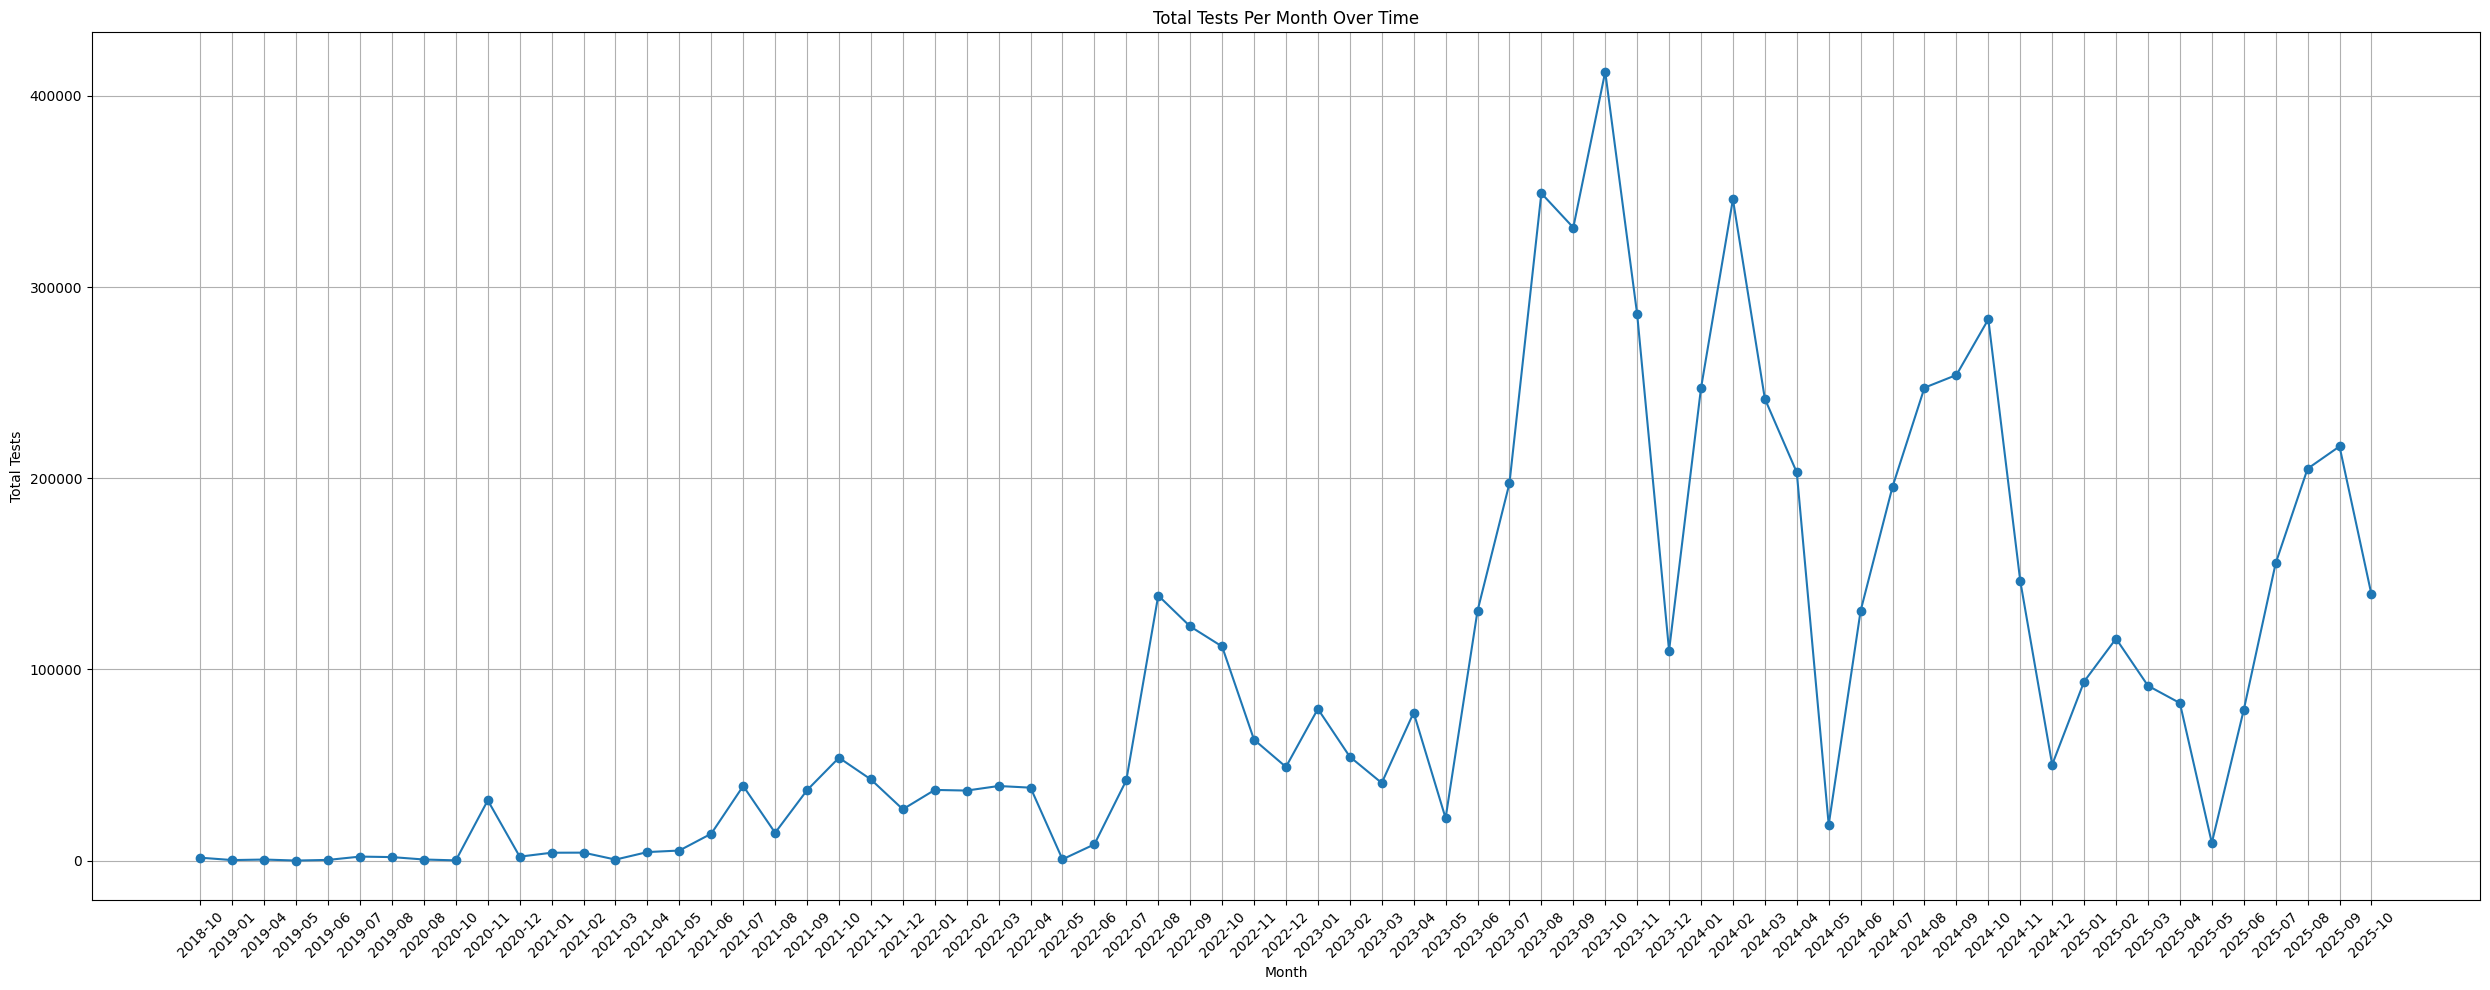

In [ ]:
#plot monthly tests over time
plt.figure(figsize=(25,10))
plt.plot(monthly_tests['year_month'],monthly_tests['total_tests'], marker='o')
plt.xticks(rotation=45)
plt.title('Total Tests Per Month Over Time')
plt.xlabel("Month")
plt.ylabel("Total Tests")
plt.grid()
plt.tight_layout()
plt.show()

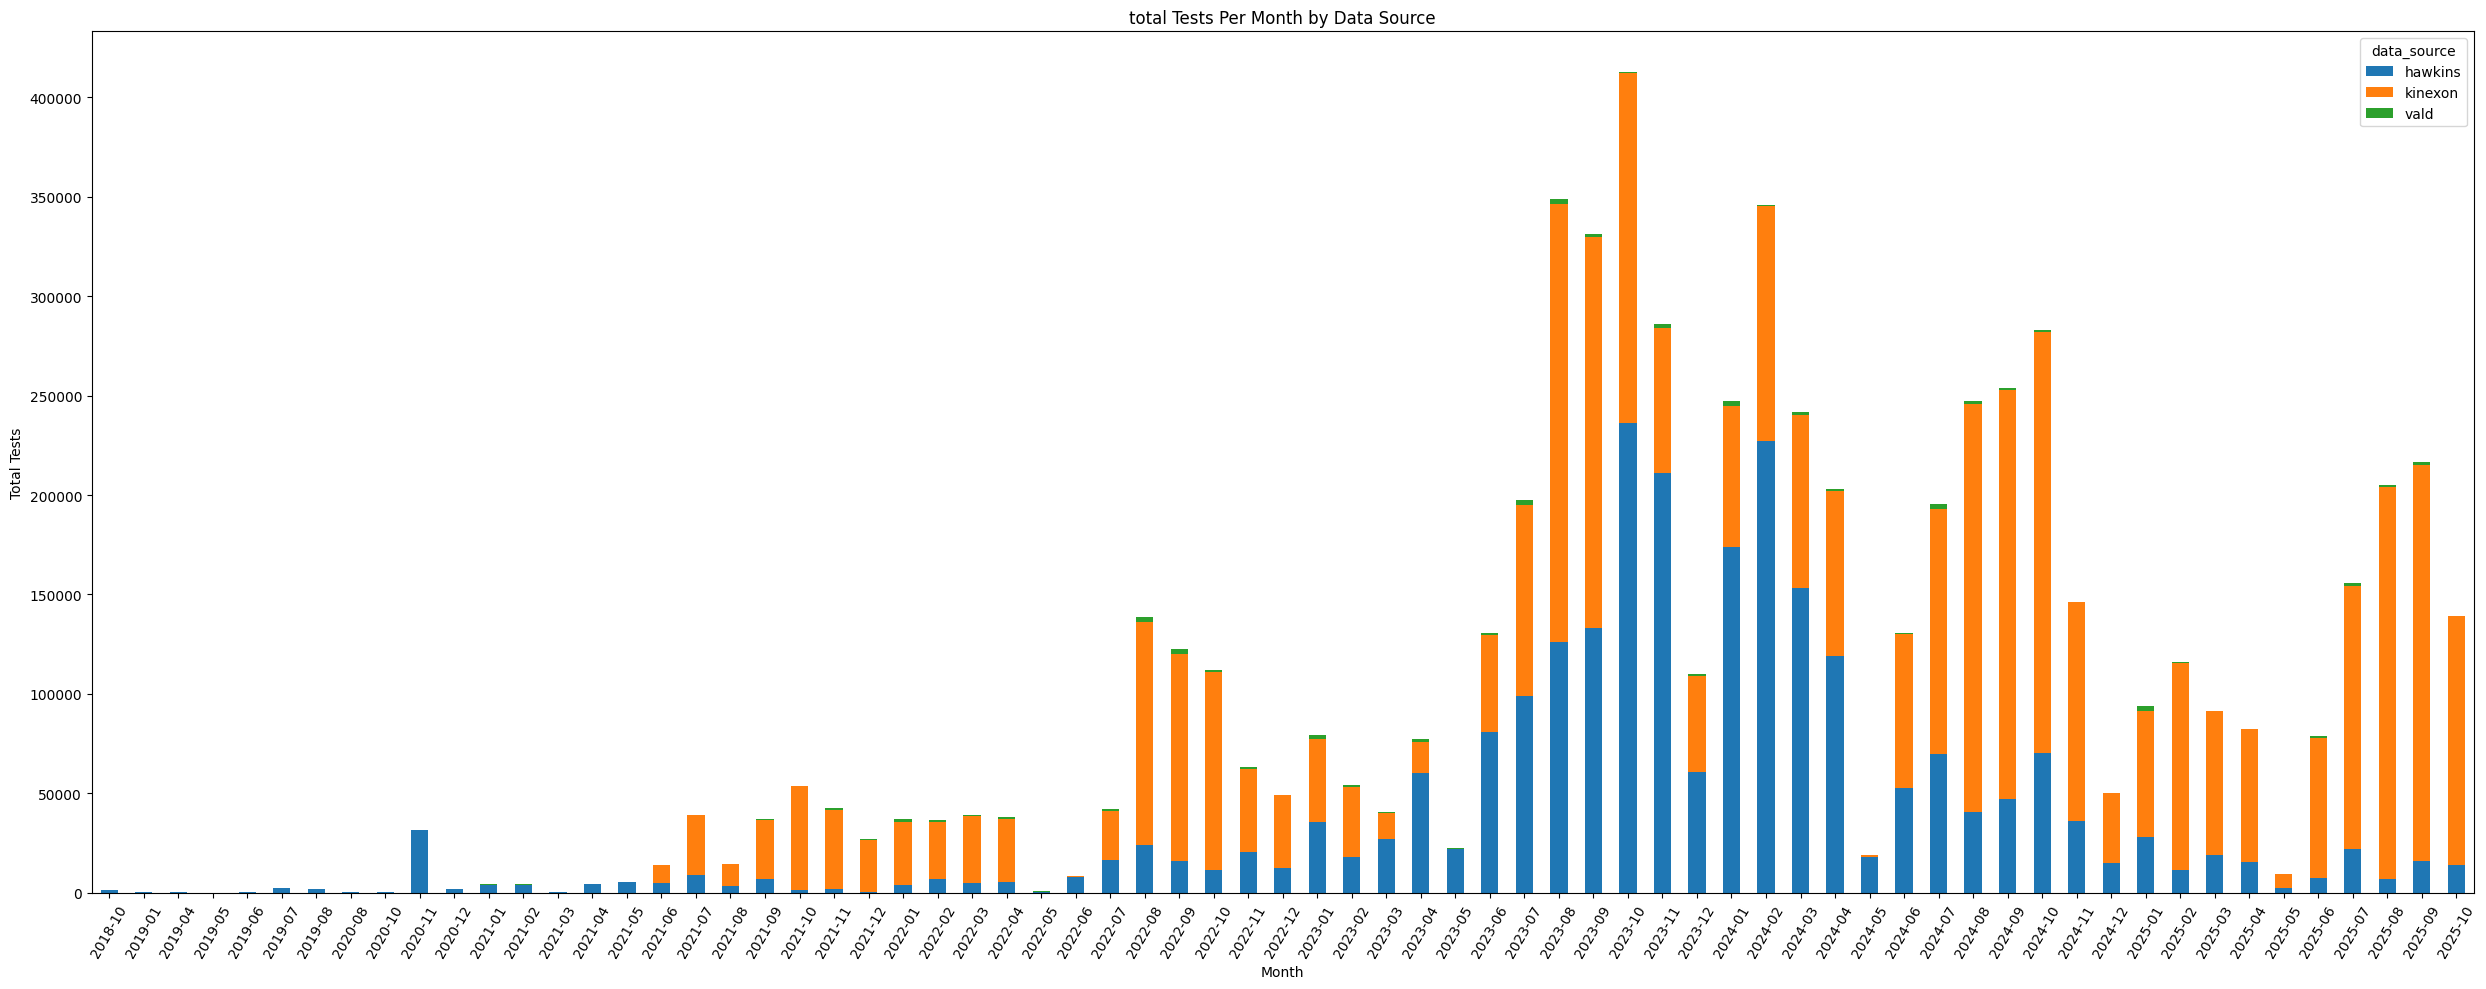

In [ ]:
# Stacked Bar Chart based on Data Source
monthly_source = df.groupby(["year_month", "data_source"]).size().reset_index(name="count")

#pivot for stacked bar
monthly_pivot = monthly_source.pivot(index ="year_month", columns='data_source', values='count').fillna(0)

monthly_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(25,10),
    title = "total Tests Per Month by Data Source"
)

plt.xlabel('Month')
plt.ylabel('Total Tests')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

The chart shows a long period of very low data collection early on, followed by a sustained increase in test volume later in the timeline. This early low activity may be due to limited use of the testing systems or delays in implementing consistent data collection procedures. Around the midpoint, there is a noticeable rise with large and consistent spikes in testing volume. Data collection also fluctuates strongly from month to month, which may reflect inconsistent adherence to testing schedules. Finally, the graph shows clear seasonal drop-offs: every year during May, there is little to no data collection, and December also displays a significant reduction in testing activity.